In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import pickle as pkl
%matplotlib inline

import sys
import os

os.chdir('..')
sys.path.append(os.getcwd())

import evaluation
# import datasets
import features

Found 440 rows with missing values.
Original shape: (463977, 10)
Shape after drop: (463933, 10)
Foredeck variance explained by first two components: 68.36%
Found 440 rows with missing values.
Original shape: (463977, 10)
Shape after drop: (463933, 10)


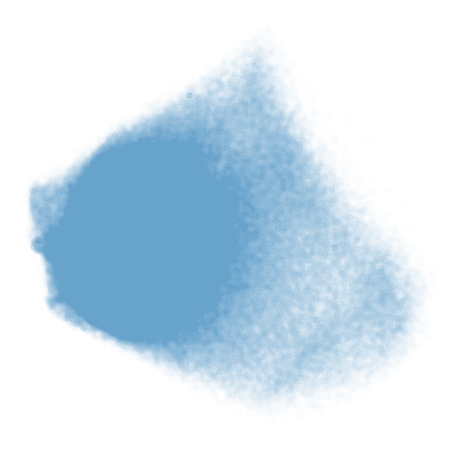

In [2]:
fd_pca = evaluation.visualization.train_pca_on_foredeck('features/foredeck/foredeck.h5',
                                                        'features/foredeck/trained_pca.pkl')

with h5py.File('features/foredeck/foredeck.h5', 'r') as hf:
    fd = np.array(hf.get('X'))
    
fd_proj = evaluation.visualization.foredeck_projection(fd, fd_pca)
x_fd, y_fd = fd_proj.T

plt.figure(figsize=(8, 8))

ax = plt.subplot(111)
ax.scatter(x_fd, y_fd, alpha=0.01)
ax.axis('off');

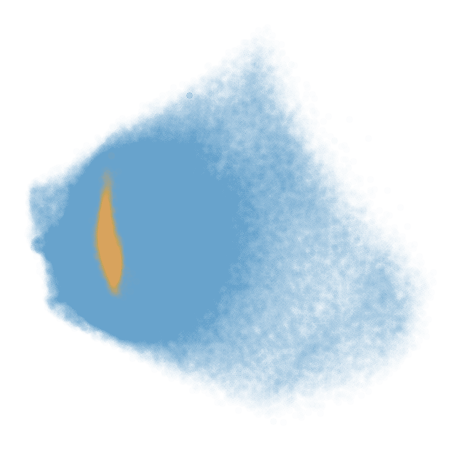

In [16]:
def plot_vs_dataset(x, y):
    plt.figure(figsize=(8, 8))

    ax = plt.subplot(111)
    ax.scatter(x_fd, y_fd, alpha=0.01)
    ax.scatter(x, y, alpha=0.01)
    ax.axis('off')

    
f6 = features.get('vanilla_lstm_large_cgan_2_14k', 6)
p6 = evaluation.visualization.foredeck_projection(f6, fd_pca)
x6, y6 = p6.T

plot_vs_dataset(x6, y6)

In [13]:
y6.min(), y6.max()

(-1.1614194271821892, 1.9833680545094516)

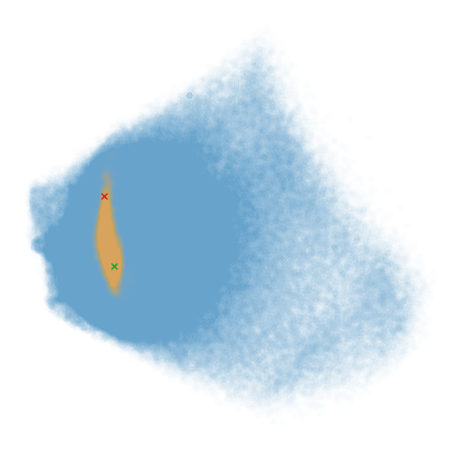

In [67]:
i1, i2 = 0, 7

ax = plot_vs_dataset(x6, y6)

ax.scatter(x6[i1], y6[i1], c='C2', marker='x')
ax.scatter(x6[i2], y6[i2], c='C3', marker='x')

plt.savefig('reports/vanilla_lstm_large_cgan_2_14k/figures/individual_series/area1.png', bbox_inches='tight')

In [36]:
def load_series(epoch):

    samples_file = 'samples/vanilla_lstm_large_cgan_2_14k/samples_epoch_{}.h5'.format(epoch)

    with h5py.File(samples_file, 'r') as hf:
        x = np.array(hf.get('X'))
        
    return x


s6 = load_series(6)

series6_1 = s6[i1]
series6_2 = s6[i2]

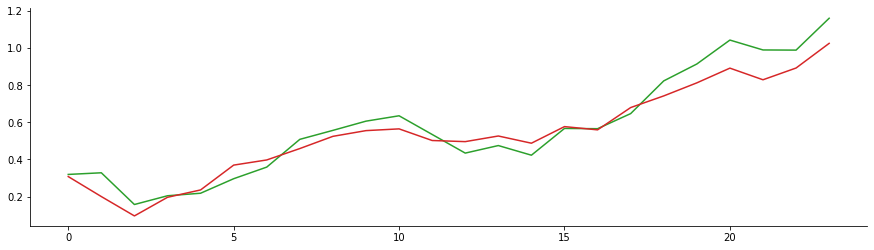

In [69]:
plt.figure(figsize=(15, 4))

ax = plt.subplot(111)
ax.plot(series6_1, c='C2')
ax.plot(series6_2, c='C3')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('reports/vanilla_lstm_large_cgan_2_14k/figures/individual_series/series1.png', bbox_inches='tight')

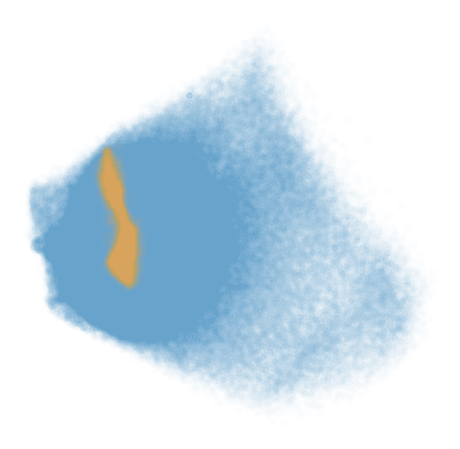

In [35]:
f31 = features.get('vanilla_lstm_large_cgan_2_14k', 30)
p31 = evaluation.visualization.foredeck_projection(f31, fd_pca)
x31, y31 = p31.T

plot_vs_dataset(x31, y31);

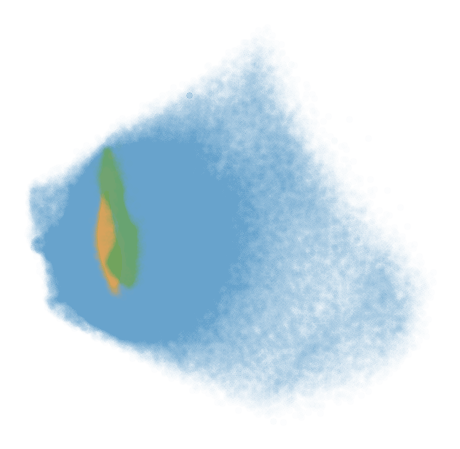

In [70]:
plt.figure(figsize=(8, 8))

ax = plt.subplot(111)
ax.scatter(x_fd, y_fd, alpha=0.01)
ax.scatter(x6, y6, alpha=0.01)
ax.scatter(x31, y31, alpha=0.01)
ax.axis('off')
plt.savefig('reports/vanilla_lstm_large_cgan_2_14k/figures/individual_series/area_comp.png', bbox_inches='tight')

In [40]:
y31[:20]

array([-0.00530185, -0.4787525 , -0.32673594, -0.26298533,  0.18320661,
       -0.59561199,  1.03280324, -0.57428328,  1.22224407,  1.95535792,
       -0.42836584,  0.26912918,  0.09913319,  0.45285215,  1.99584225,
       -0.49835289,  0.08281237,  0.10073368,  0.01691472, -0.78786688])

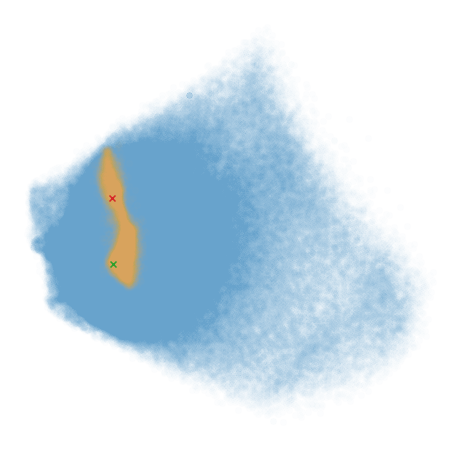

In [71]:
i3, i4 = 10, 6

ax = plot_vs_dataset(x31, y31)

ax.scatter(x31[i3], y31[i3], c='C2', marker='x')
ax.scatter(x31[i4], y31[i4], c='C3', marker='x')
plt.savefig('reports/vanilla_lstm_large_cgan_2_14k/figures/individual_series/area2.png', bbox_inches='tight')

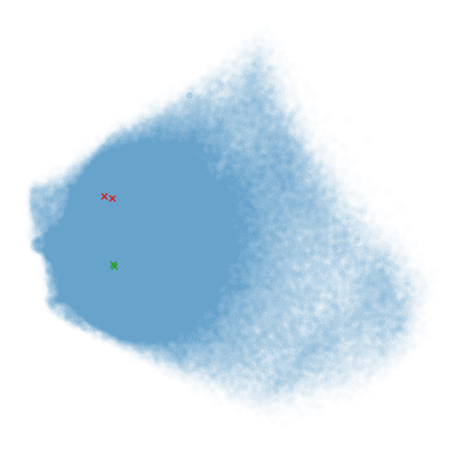

In [72]:
ax = plot_vs_dataset([], [])

ax.scatter(x31[i3], y31[i3], c='C2', marker='x')
ax.scatter(x31[i4], y31[i4], c='C3', marker='x')

ax.scatter(x6[i1], y6[i1], c='C2', marker='x')
ax.scatter(x6[i2], y6[i2], c='C3', marker='x')

plt.savefig('reports/vanilla_lstm_large_cgan_2_14k/figures/individual_series/area3.png', bbox_inches='tight')

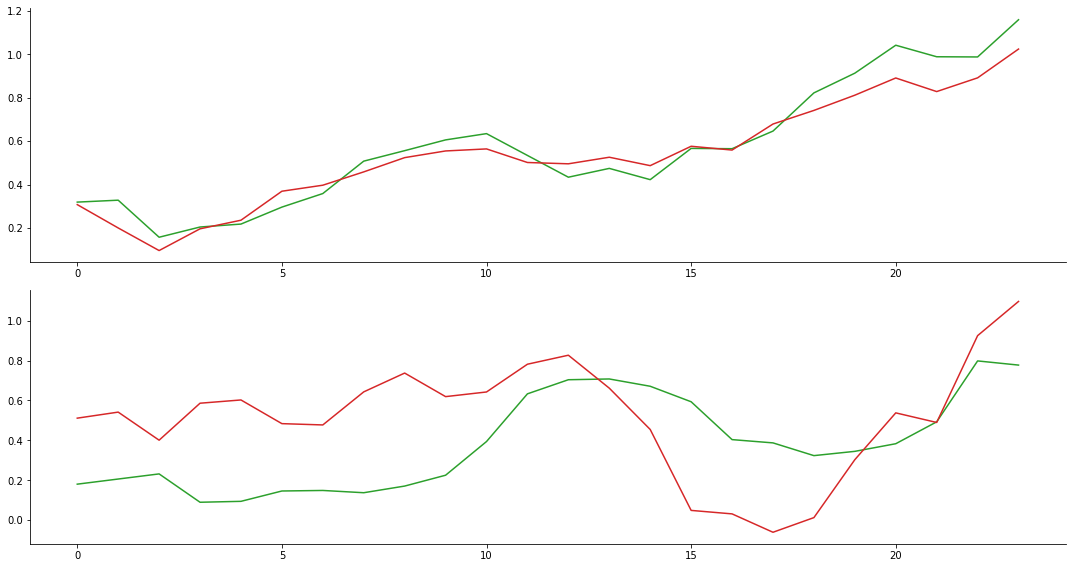

In [74]:
s31 = load_series(30)

series31_1 = s31[i3]
series31_2 = s31[i4]


plt.figure(figsize=(15, 8))

ax = plt.subplot(211)
ax.plot(series6_1, c='C2')
ax.plot(series6_2, c='C3')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax = plt.subplot(212)
ax.plot(series31_1, c='C2')
ax.plot(series31_2, c='C3')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('reports/vanilla_lstm_large_cgan_2_14k/figures/individual_series/series2.png', bbox_inches='tight')

In [63]:
np.round(fd_pca['pca'].components_[1], 2)

array([ 0.14, -0.3 ,  0.  , -0.  , -0.28,  0.51, -0.45, -0.34,  0.42,
       -0.22])